In [2]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


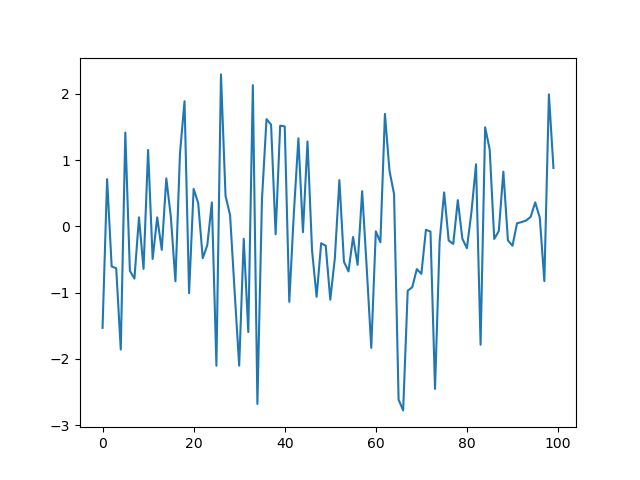

In [3]:
data = np.random.randn(100)
plt.plot(data)

# Markdown

In [30]:
from astropy.io import ascii

labdata=ascii.read(r"C:\Users\br3212oe\Documents\Phys 330\Lab4\Lab4.csv")
time=labdata.columns[0]
time=np.array([time])[0]

vinput=labdata.columns[1]
vinput=np.array([vinput])[0]

voutput=labdata.columns[2]
voutput=np.array([voutput])[0]

<IPython.core.display.Javascript object>


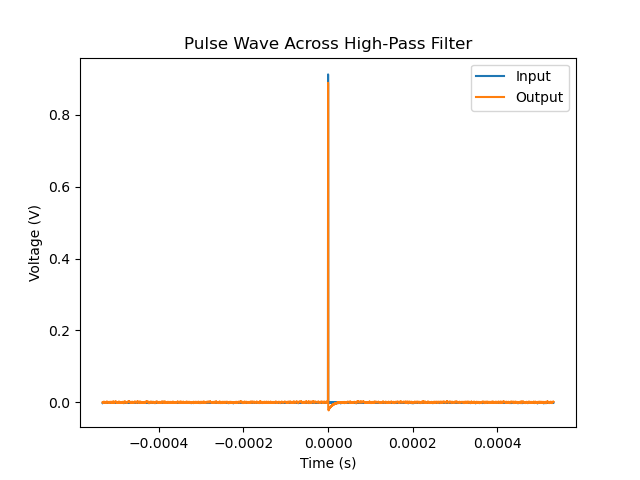

Text(0, 0.5, 'Voltage (V)')

In [48]:
plt.close()
plt.plot(time, vinput, label= 'Input')
plt.plot(time, voutput, label='Output')
plt.legend()
plt.title('Pulse Wave Across High-Pass Filter')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')

In [45]:
realin=np.real(np.fft.fft(np.fft.fftshift(vinput)))
imagin=np.imag(np.fft.fft(np.fft.fftshift(vinput)))
realout=np.real(np.fft.fft(np.fft.fftshift(voutput)))
imagout=np.imag(np.fft.fft(np.fft.fftshift(voutput)))
freq=np.fft.fftfreq(len(time),time[1]-time[0])

<IPython.core.display.Javascript object>


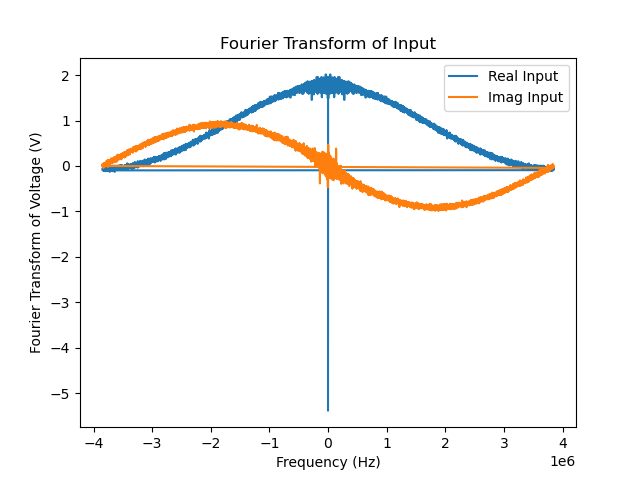

Text(0, 0.5, 'Fourier Transform of Voltage (V)')

In [46]:
plt.close()
plt.plot(freq, realin, label= 'Real Input')
plt.plot(freq, imagin, label= 'Imag Input')
plt.legend()
plt.title('Fourier Transform of Input')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Fourier Transform of Voltage (V)')

<IPython.core.display.Javascript object>


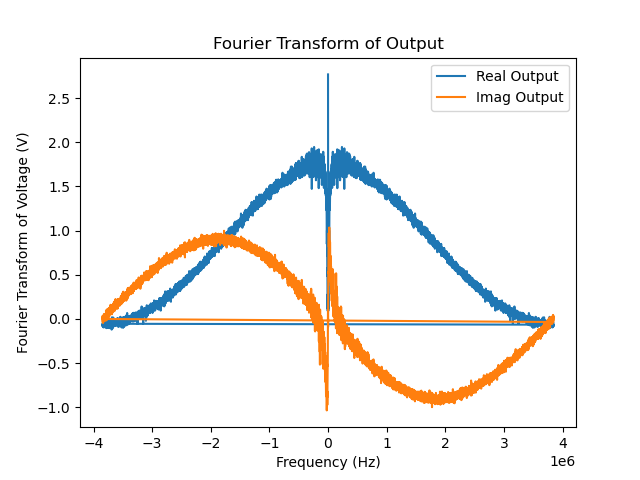

Text(0, 0.5, 'Fourier Transform of Voltage (V)')

In [47]:
plt.close()
plt.plot(freq, realout, label= 'Real Output')
plt.plot(freq, imagout, label= 'Imag Output')
plt.legend()
plt.title('Fourier Transform of Output')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Fourier Transform of Voltage (V)')

In [81]:
i=complex(0,1)
R=200
C=0.00000001
w=2*np.pi*freq
theo=1/(1+1/(i*R*C*w))
measin=np.fft.fft(np.fft.fftshift(vinput))
measout=np.fft.fft(np.fft.fftshift(voutput))


<ipython-input-81-5a7c2d87cc0d>:5: RuntimeWarning: divide by zero encountered in true_divide
  theo=1/(1+1/(i*R*C*w))
<ipython-input-81-5a7c2d87cc0d>:5: RuntimeWarning: invalid value encountered in true_divide
  theo=1/(1+1/(i*R*C*w))


<IPython.core.display.Javascript object>


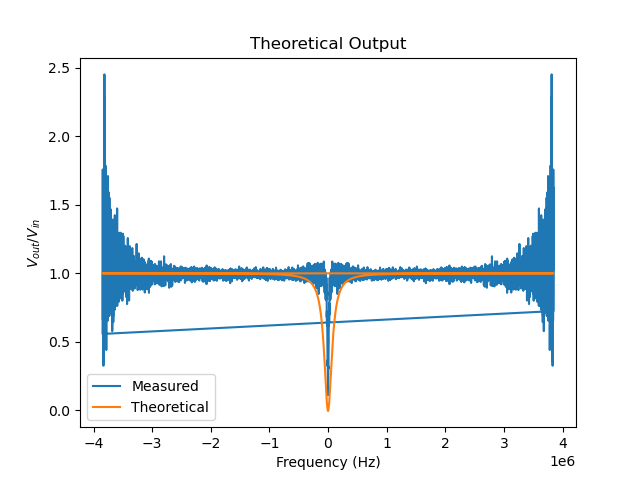

C:\Users\br3212oe\Miniconda3\envs\phys330\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0, 0.5, '$V_{out}/V_{in}$')

In [82]:
plt.close()
plt.plot(freq, np.abs(measout/measin), label='Measured')
plt.plot(freq, theo, label= 'Theoretical')
plt.legend()
plt.title('Theoretical Output')
plt.xlabel('Frequency (Hz)')
plt.ylabel('$V_{out}/V_{in}$')